In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Read data

Your task is to find parameters $\beta$ of a linear model that approximates the following observations. Each observation is decribed by only one input feature $x_{1}$.

In [2]:
# Read data for the file
data = pd.read_csv("data.csv")

# Display the first 5 rows of the data
data.head()

,x1,y
0,-1.000,-1.401
1,-0.959,-1.436
2,-0.918,-1.187
3,-0.878,-0.920
4,-0.837,-1.179


In [3]:
# Get a matrix of the input feature of the observations
x1 = data[['x1']].values

# Get a vector of target values you need to approximate
y = data['y'].values

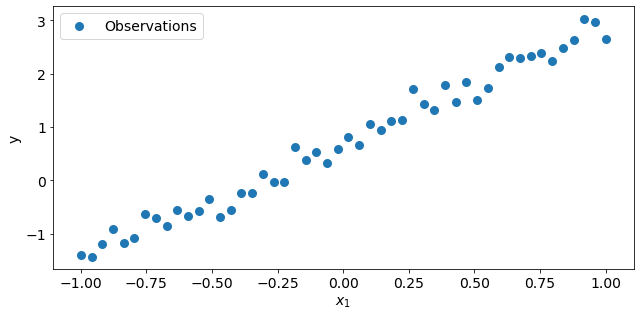

In [4]:
# Plot the observations

plt.figure(figsize=(9, 4.5))
plt.scatter(x1, y, linewidth=3, label="Observations")
plt.xlabel(r'$x_{1}$', size=14)
plt.xticks(size=14)
plt.ylabel(r"y", size=14)
plt.yticks(size=14)
plt.legend(loc='best', fontsize=14)
plt.tight_layout()
plt.show()

## Create matrix X

Now you have the vector of targets $y = (y_{1}, y_{2}, ..., y_{n})^{T}$. Create a matrix $X$ that is defined as

$$
X = \left( \begin{array}{ccccc} 
         1 & x_{11} & x_{12} & \cdots & x_{1d} \\ 
         1 & x_{21} & x_{22} & \cdots & x_{2d} \\ 
         \vdots & \vdots  & \vdots  & \cdots & \vdots  \\
         1 & x_{n1} & x_{n2} & \cdots & x_{nd} \\ 
         \end{array} \right)
$$

Rememder that your observations have only one input feature $x_{i1}$.

**Hint:** Use `np.ones()` function to generate a vector of ones $(1, 1, ..., 1)^{T}$. To concatenate two matrices $a$ and $b$ use function `np.hstack((a, b))`.

In [5]:
ones = np.ones(shape=(len(x1), 1))
X = np.hstack((ones, x1))

print("Output:")
X[:2, :]

Output:


array([[ 1.   , -1.   ],
       [ 1.   , -0.959]])

Expected otput :  
`[[ 1.   , -1.   ], 
  [ 1.   , -0.959]]`

## Init $\beta$

In [6]:
beta = np.array([0, 0])

print("Output:")
beta

Output:


array([0, 0])

## Loss

Calculate the loss function defined as:

$$
L(\beta) = \frac{1}{n} (X\beta - y)^{T}(X\beta - y)
$$

**Hint:** To multiply two matrices $a$ and $b$ use functions `a.dot(b)` or `np.dot(a, b)`.

In [7]:
def loss_func(beta):
    loss = (X.dot(beta) - y).T.dot( X.dot(beta) - y ) / len(y)
    return loss

loss = loss_func(beta)

print("Output:")
loss

Output:


2.19695098

Expected otput :  
`2.19695098`

## Gradient of the loss function

Calculate gradient of the loss function $\nabla L$ defined as:
    
$$
\nabla L = \frac{\partial L}{\partial \beta} = \frac{2}{n} X^{T} (X\beta - y)
$$

**Hint:** To multiply two matrices $a$ and $b$ use functions `a.dot(b)` or `np.dot(a, b)`.

In [8]:
def grad_func(beta):
    grad = 2. * X.T.dot( X.dot(beta) - y ) / len(y)
    return grad

grad = grad_func(beta)

print("Output:")
grad

Output:


array([-1.40972   , -1.52095704])

Expected otput :  
`[-1.40972   , -1.52095704]`

## Gradient descent

Now implement gradient descent for the approximation. The update rule for $\beta$ is:

$$
\beta_{(t+1)} = \beta_{(t)} - \alpha \nabla L(\beta_{(t)})
$$

Estimate how many iterations $t$ it is needed to satisfy the following stop criterion:

$$
| L(\beta_{(t)} - L(\beta_{(t-1)} | < 10^{-4}
$$

**Hint:** To multiply two matrices $a$ and $b$ use functions `a.dot(b)` or `np.dot(a, b)`.

In [9]:
alpha = 0.1              # learning rate
beta = np.array([0, 0])  # init beta, again :)

beta_collector = [beta]
loss_collector = [loss_func(beta)]

for i_iter in range(1000): # for each iteration
    # Calculate gradient
    grad = grad_func(beta)
    # Update beta
    beta = beta - alpha * grad
    # Save new beta
    beta_collector.append(beta)
    # Calculate loss
    loss = loss_func(beta)
    # Save loss
    loss_collector.append(loss)
    
    # Stop criterion
    if np.abs( loss_collector[-1] - loss_collector[-2] ) < 10**-4:
        print("Iteration: ", i_iter)
        print("Beta: ", beta)
        print("Loss: ", loss)
        break

Iteration:  54
Beta:  [0.7048567  2.15011023]
Loss:  0.03368171803472682


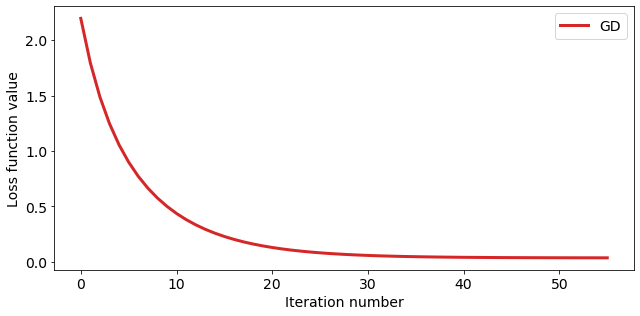

In [10]:
# Plot learning curve
plt.figure(figsize=(9, 4.5))
plt.plot(loss_collector, linewidth=3, label="GD", color='C3')
plt.xlabel(r'Iteration number', size=14)
plt.xticks(size=14)
plt.ylabel(r"Loss function value", size=14)
plt.yticks(size=14)
plt.legend(loc='best', fontsize=14, ncol=2)
plt.tight_layout()
plt.show()